<a href="https://colab.research.google.com/github/tophervt/StockChart/blob/main/Stock3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-ddcdb76584f2>:120: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


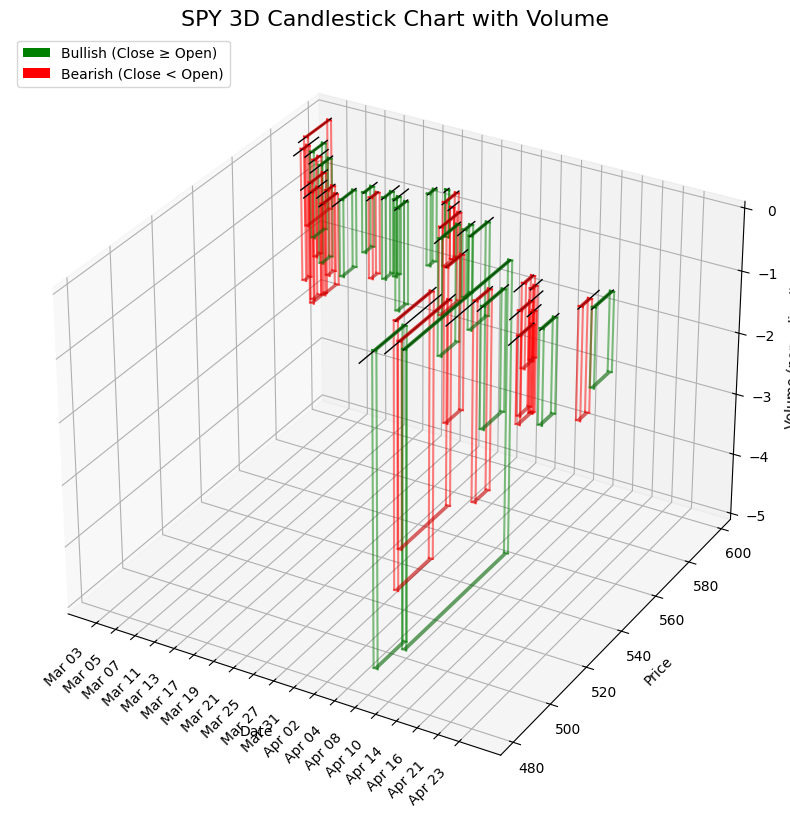

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle
from matplotlib.collections import PolyCollection
import matplotlib.dates as mdates
from datetime import datetime

# Function to parse date string
def parse_date(date_str):
    # Example format: "Mar 3, 2025"
    return datetime.strptime(date_str, "%b %d, %Y")

# Load and prepare data
def load_data(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Process the volume column (remove commas and convert to int)
    df['Volume'] = df['Volume'].str.replace(',', '').astype(float)

    # Convert string dates to datetime objects
    df['Date'] = df['Date'].apply(parse_date)

    # Sort by date (important for sequential visualization)
    df = df.sort_values('Date')

    # Add color column for candlesticks (green for bullish, red for bearish)
    df['Color'] = np.where(df['Close'] >= df['Open'], 'green', 'red')

    return df

# Function to create 3D candlestick chart with volume
def plot_3d_candlestick_with_volume(df):
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Create x axis (dates converted to integers for plotting)
    x = np.arange(len(df))
    date_labels = [d.strftime('%b %d') for d in df['Date']]

    # Set width of candlesticks
    width = 0.4

    # Normalize volume for better visualization
    max_volume = df['Volume'].max()
    normalized_volume = df['Volume'] / max_volume * 5  # Scale to max depth of 5

    # Plot candlesticks and volume
    for i, (idx, row) in enumerate(df.iterrows()):
        # Get coordinates
        open_price = row['Open']
        close_price = row['Close']
        high_price = row['High']
        low_price = row['Low']
        color = row['Color']

        # Volume as depth (z-axis)
        volume = normalized_volume.iloc[i]

        # Plot the candlestick body
        if close_price >= open_price:
            # Bullish candle (close >= open)
            body_bottom = open_price
            body_height = close_price - open_price
        else:
            # Bearish candle (close < open)
            body_bottom = close_price
            body_height = open_price - close_price

        # Create vertices for the candlestick body (3D box)
        x_points = [x[i] - width/2, x[i] + width/2]
        y_points = [body_bottom, body_bottom + body_height]
        z_points = [0, -volume]  # Using negative z for better visualization

        # Plot candlestick body as 3D box
        xx, yy = np.meshgrid(x_points, y_points)

        # Front face
        ax.plot_surface(xx, yy, np.zeros_like(xx), color=color, alpha=0.8)
        # Back face
        ax.plot_surface(xx, yy, -volume * np.ones_like(xx), color=color, alpha=0.6)
        # Connect sides
        for x_val, y_val in [(x_points[0], y_points[0]), (x_points[0], y_points[1]),
                             (x_points[1], y_points[0]), (x_points[1], y_points[1])]:
            ax.plot([x_val, x_val], [y_val, y_val], [0, -volume], color=color, alpha=0.5)

        # Plot top and bottom
        for y_val in y_points:
            ax.plot([x_points[0], x_points[1]], [y_val, y_val], [0, 0], color=color, alpha=0.7)
            ax.plot([x_points[0], x_points[1]], [y_val, y_val], [-volume, -volume], color=color, alpha=0.5)

        # Plot the high-low line (wick)
        ax.plot([x[i], x[i]], [low_price, high_price], [0, 0], color='black', linewidth=1)

        # Plot volume as semi-transparent block under candle
        # (Already visualized with the 3D candlestick)

    # Customize the plot
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_zlabel('Volume (normalized)')

    # Set x-axis tick labels to dates
    ax.set_xticks(x[::2])  # Show every other date to avoid overcrowding
    ax.set_xticklabels(date_labels[::2], rotation=45, ha='right')

    # Set plot title and legend
    plt.title('SPY 3D Candlestick Chart with Volume', fontsize=16)

    # Add custom legend
    green_patch = plt.Rectangle((0, 0), 1, 1, fc="green")
    red_patch = plt.Rectangle((0, 0), 1, 1, fc="red")
    plt.legend([green_patch, red_patch], ['Bullish (Close ≥ Open)', 'Bearish (Close < Open)'], loc='upper left')

    # Adjust view angle for better visualization
    ax.view_init(elev=30, azim=-60)

    plt.tight_layout()
    return fig

# Main function to execute the visualization
def main(file_path='SPY.csv'):
    # Load data
    df = load_data(file_path)

    # Create the 3D visualization
    fig = plot_3d_candlestick_with_volume(df)

    # Save the figure
    plt.savefig('spy_3d_candlestick_volume.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

    return fig

# If running as a script
if __name__ == "__main__":
    main()

In [8]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Read the data
# df = pd.read_csv('SPY.csv')
df = pd.DataFrame({
    'Date': ["Mar 3, 2025", "Mar 4, 2025", "Mar 5, 2025", "Mar 6, 2025", "Mar 7, 2025",
             "Mar 10, 2025", "Mar 11, 2025", "Mar 12, 2025", "Mar 13, 2025", "Mar 14, 2025",
             "Mar 17, 2025", "Mar 18, 2025", "Mar 19, 2025", "Mar 20, 2025", "Mar 21, 2025",
             "Mar 24, 2025", "Mar 25, 2025", "Mar 26, 2025", "Mar 27, 2025", "Mar 28, 2025",
             "Mar 31, 2025", "Apr 1, 2025", "Apr 2, 2025", "Apr 3, 2025", "Apr 4, 2025",
             "Apr 7, 2025", "Apr 8, 2025", "Apr 9, 2025", "Apr 10, 2025", "Apr 11, 2025",
             "Apr 14, 2025", "Apr 15, 2025", "Apr 16, 2025", "Apr 17, 2025", "Apr 21, 2025",
             "Apr 22, 2025", "Apr 23, 2025", "Apr 24, 2025"],
    'Open': [596.18, 579.71, 576.69, 575.48, 570.9, 567.59, 559.4, 562.17, 558.49, 556.11,
             562.79, 564.8, 562.83, 563.33, 559.28, 570.8, 575.3, 575.19, 567.18, 565.53,
             549.83, 557.45, 555.05, 545.11, 523.67, 489.19, 521.86, 493.44, 532.17, 523.01,
             544.05, 539.67, 531.68, 527.64, 521.16, 520.14, 540.43, 536.72],
    'High': [597.34, 585.39, 584.88, 580.17, 577.39, 569.54, 564.02, 563.11, 559.11, 563.83,
             569.71, 565.02, 570.95, 570.57, 564.89, 575.15, 576.41, 576.33, 570.9, 566.27,
             560.71, 562.94, 567.42, 547.97, 525.87, 523.17, 524.98, 548.62, 533.5, 536.43,
             544.28, 543.23, 537.89, 531.17, 521.7, 529.3, 545.43, 547.43],
    'Low': [579.9, 572.25, 573.08, 570.12, 565.63, 555.59, 552.02, 553.69, 549.68, 551.49,
            562.35, 559.06, 561.63, 562.6, 558.03, 570.2, 573.69, 567.19, 564.94, 555.07,
            546.87, 553.68, 554.81, 536.7, 505.06, 481.8, 489.16, 493.05, 509.32, 520.07,
            533.86, 536.81, 520.29, 523.91, 508.46, 519.19, 533.88, 535.45],
    'Close': [583.77, 576.86, 583.06, 572.71, 575.92, 560.58, 555.92, 558.87, 551.42, 562.81,
              567.15, 561.02, 567.13, 565.49, 563.98, 574.08, 575.46, 568.59, 567.08, 555.66,
              559.39, 560.97, 564.52, 536.7, 505.28, 504.38, 496.48, 548.62, 524.58, 533.94,
              539.12, 537.61, 525.66, 526.41, 513.88, 527.25, 535.42, 546.69],
    'Volume': [74249200, 109648200, 71230500, 80094900, 81158800, 99326600, 88102100, 69588200,
               74079400, 62660300, 49008700, 66041400, 66556000, 62958200, 83763000, 58766800,
               38355700, 51848300, 42164200, 71662700, 95328200, 54609600, 76014500, 125986000,
               217965100, 256611400, 165816600, 241867300, 162331200, 97866300, 68034000,
               56892900, 83484800, 79741000, 69368100, 75948100, 90590700, 63748600]
})

# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Calculate date differences for x-axis spacing
df['x_val'] = range(len(df))

# Normalize volume for shadow length
max_volume = df['Volume'].max()
min_volume = df['Volume'].min()
df['shadow_length'] = 0.3 + (df['Volume'] - min_volume) / (max_volume - min_volume) * 0.5

#Limiting y
df['candle_bottom'] = df[['Open', 'Close']].min(axis=1)
df['shadow_ymin'] = df['candle_bottom'] - df['shadow_length'] * 50  # Half shadow length as in y_shadow

y_min = df['shadow_ymin'].min()
y_max = df[['High']].max().max()


# Create figure
fig = go.Figure()

# Define candlestick width
candlestick_width = 0.8

# Add candlestick chart
fig.add_trace(
    go.Candlestick(
        x=df['x_val'],
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        name='Price',
        increasing_line_color='green',
        decreasing_line_color='red',
        increasing_fillcolor='green',
        decreasing_fillcolor='red',
        line=dict(width=1),
        whiskerwidth=0.8,
    )
)

# Add volume shadows using shapes
for i, row in df.iterrows():
    # Determine bottom of candlestick
    candle_bottom = min(row['Open'], row['Close'])

    # Shadow dimensions
    shadow_length = row['shadow_length'] *100

    # Add shadow as a filled polygon
    x_val = row['x_val']

    # The points for the shadow polygon (counter-clockwise)
    # Start from bottom left of candlestick
    x_shadow = [
        x_val - candlestick_width/2,  # Bottom left of candle
        x_val + candlestick_width/2,  # Bottom right of candle
        x_val + candlestick_width/2 - shadow_length,  # Bottom right of shadow
        x_val - candlestick_width/2 - shadow_length,  # Bottom left of shadow
    ]

    # Fixed offset for shadow
    shadow_offset = 5

    # y_shadow = [
    #     candle_bottom,  # Bottom left of candle
    #     candle_bottom,  # Bottom right of candle
    #     candle_bottom - shadow_offset,  # Bottom right of shadow
    #     candle_bottom - shadow_offset,  # Bottom left of shadow
    # ]
    y_shadow = [
    candle_bottom,  # Bottom left
    candle_bottom,  # Bottom right
    candle_bottom - shadow_length/2,  # Top right
    candle_bottom - shadow_length/2,  # Top left
]

    # Add shadow
    fig.add_trace(
        go.Scatter(
            x=x_shadow,
            y=y_shadow,
            mode='lines',
            fill="toself",
            fillcolor='rgba(0, 0, 0, 0.6)',
            line=dict(color='rgba(0, 0, 0, 0.8)', width=1),
            hoverinfo='text',
            hovertext=f'Volume: {row["Volume"]:,}',
            showlegend=False,
        )
    )

# Add a legend entry for volume shadows
fig.add_trace(
    go.Scatter(
        x=[None],
        y=[None],
        mode='lines',
        line=dict(color='rgba(0, 0, 0, 0.8)', width=10),
        name='Volume Shadow',
        xaxis='x',  # 👈 Force it onto the main x-axis
        yaxis='y'
    )
)

# Configure date labels
date_labels = [date.strftime('%b %d') if i % 3 == 0 else '' for i, date in enumerate(df['Date'])]

# Update layout
fig.update_layout(
    title='SPY Candlestick Chart with Volume Shadows (Mar-Apr 2025)',
    xaxis=dict(
        title='Date',
        tickvals=list(df['x_val']),
        ticktext=date_labels,
        tickangle=-45
    ),
        yaxis=dict(
        title='Price ($)',
        domain=[0.0, 1.0],  # Use entire vertical space
        #range=[df[['Low', 'shadow_length']].min().min() - 20, df['High'].max() + 20],
        anchor='x',
        range=[y_min, y_max]
    ),
    height=1000,
    width=1000,
    template='plotly_white',
    # hovermode='x unified',
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
)

# Show the figure
fig.show()

In [16]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Sample SPY data (replace with your CSV if desired)
df = pd.DataFrame({
    'Date': ["Mar 3, 2025", "Mar 4, 2025", "Mar 5, 2025", "Mar 6, 2025", "Mar 7, 2025",
             "Mar 10, 2025", "Mar 11, 2025", "Mar 12, 2025", "Mar 13, 2025", "Mar 14, 2025",
             "Mar 17, 2025", "Mar 18, 2025", "Mar 19, 2025", "Mar 20, 2025", "Mar 21, 2025",
             "Mar 24, 2025", "Mar 25, 2025", "Mar 26, 2025", "Mar 27, 2025", "Mar 28, 2025",
             "Mar 31, 2025", "Apr 1, 2025", "Apr 2, 2025", "Apr 3, 2025", "Apr 4, 2025",
             "Apr 7, 2025", "Apr 8, 2025", "Apr 9, 2025", "Apr 10, 2025", "Apr 11, 2025",
             "Apr 14, 2025", "Apr 15, 2025", "Apr 16, 2025", "Apr 17, 2025", "Apr 21, 2025",
             "Apr 22, 2025", "Apr 23, 2025", "Apr 24, 2025"],
    'Open': [596.18, 579.71, 576.69, 575.48, 570.9, 567.59, 559.4, 562.17, 558.49, 556.11,
             562.79, 564.8, 562.83, 563.33, 559.28, 570.8, 575.3, 575.19, 567.18, 565.53,
             549.83, 557.45, 555.05, 545.11, 523.67, 489.19, 521.86, 493.44, 532.17, 523.01,
             544.05, 539.67, 531.68, 527.64, 521.16, 520.14, 540.43, 536.72],
    'High': [597.34, 585.39, 584.88, 580.17, 577.39, 569.54, 564.02, 563.11, 559.11, 563.83,
             569.71, 565.02, 570.95, 570.57, 564.89, 575.15, 576.41, 576.33, 570.9, 566.27,
             560.71, 562.94, 567.42, 547.97, 525.87, 523.17, 524.98, 548.62, 533.5, 536.43,
             544.28, 543.23, 537.89, 531.17, 521.7, 529.3, 545.43, 547.43],
    'Low': [579.9, 572.25, 573.08, 570.12, 565.63, 555.59, 552.02, 553.69, 549.68, 551.49,
            562.35, 559.06, 561.63, 562.6, 558.03, 570.2, 573.69, 567.19, 564.94, 555.07,
            546.87, 553.68, 554.81, 536.7, 505.06, 481.8, 489.16, 493.05, 509.32, 520.07,
            533.86, 536.81, 520.29, 523.91, 508.46, 519.19, 533.88, 535.45],
    'Close': [583.77, 576.86, 583.06, 572.71, 575.92, 560.58, 555.92, 558.87, 551.42, 562.81,
              567.15, 561.02, 567.13, 565.49, 563.98, 574.08, 575.46, 568.59, 567.08, 555.66,
              559.39, 560.97, 564.52, 536.7, 505.28, 504.38, 496.48, 548.62, 524.58, 533.94,
              539.12, 537.61, 525.66, 526.41, 513.88, 527.25, 535.42, 546.69],
    'Volume': [74249200, 109648200, 71230500, 80094900, 81158800, 99326600, 88102100, 69588200,
               74079400, 62660300, 49008700, 66041400, 66556000, 62958200, 83763000, 58766800,
               38355700, 51848300, 42164200, 71662700, 95328200, 54609600, 76014500, 125986000,
               217965100, 256611400, 165816600, 241867300, 162331200, 97866300, 68034000,
               56892900, 83484800, 79741000, 69368100, 75948100, 90590700, 63748600]
})

# Convert Date to datetime and add x-axis values
df['Date'] = pd.to_datetime(df['Date'])
df['x_val'] = range(len(df))

# Normalize volume for shadow length
df['shadow_length'] = 0.5 + (df['Volume'] - df['Volume'].min()) / (df['Volume'].max() - df['Volume'].min()) * 10

# Create figure
fig = go.Figure()

# Add candlestick chart
fig.add_trace(
    go.Candlestick(
        x=df['x_val'],
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        name='SPY',
        increasing_line_color='green',
        decreasing_line_color='red'
    )
)

# Add volume shadows
for i, row in df.iterrows():
    candle_bottom = min(row['Open'], row['Close'])
    shadow_bottom = candle_bottom - row['shadow_length']

    # fig.add_trace(
    #     go.Scatter(
    #         x=[row['x_val'] - 0.3, row['x_val'] + 0.3, row['x_val'] + 0.3, row['x_val'] - 0.3],
    #         y=[candle_bottom, candle_bottom, shadow_bottom, shadow_bottom],
    #         fill='toself',
    #         fillcolor='rgba(0,0,0,0.5)',
    #         line=dict(width=0),
    #         mode='none',
    #         showlegend=False,
    #         hoverinfo='skip'
    #     )
    # )
    lean_amount = 0.5  # Bigger = more tilt to the left

    fig.add_trace(
        go.Scatter(
            x=[
                row['x_val'] - 0.3,              # top-left
                row['x_val'] + 0.3,              # top-right
                row['x_val'] + 0.3 - lean_amount,  # bottom-right (shifted left)
                row['x_val'] - 0.3 - lean_amount   # bottom-left (shifted left)
            ],
            y=[
                candle_bottom,  # top-left
                candle_bottom,  # top-right
                shadow_bottom,  # bottom-right
                shadow_bottom   # bottom-left
            ],
            fill='toself',
            fillcolor='rgba(0,0,0,0.5)',
            line=dict(width=0),
            mode='none',
            showlegend=False,
            hoverinfo='skip'
        )
    )

# Custom x-axis labels
fig.update_layout(
    xaxis=dict(
        title='Date',
        tickvals=list(df['x_val']),
        ticktext=[date.strftime('%b %d') for date in df['Date']],
        tickangle=-45
    ),
    yaxis_title='Price ($)',
    title='SPY Candlestick Chart with Volume Shadows',
    height=700,
    template='plotly_white',
    showlegend=False
)

fig.show()


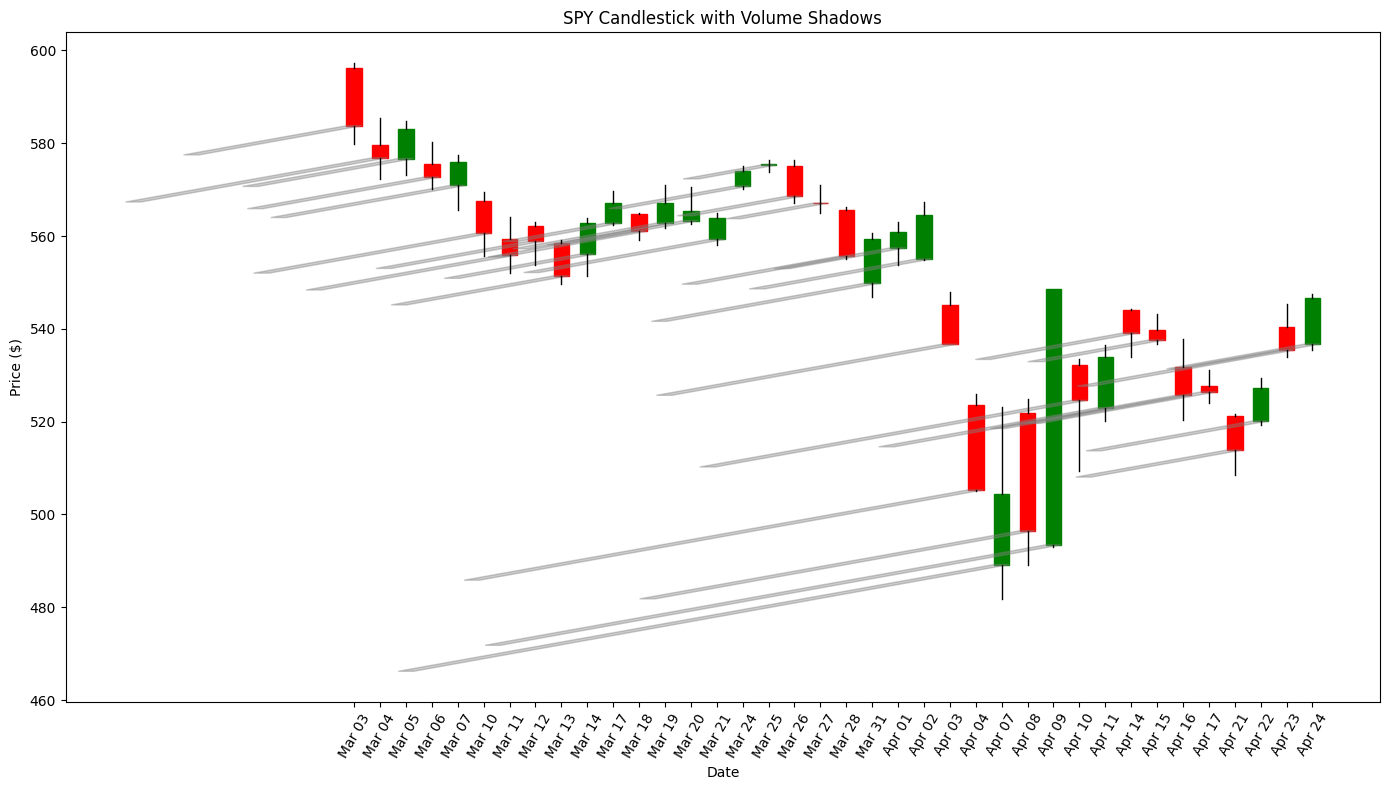

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from datetime import datetime

df = pd.read_csv("SPY.csv", parse_dates=['Date'])

cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')


df['Volume'] = df['Volume'].astype(str).str.replace(',', '')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

df['Date'] = pd.to_datetime(df['Date'])

max_volume = df['Volume'].max()
min_volume = df['Volume'].min()
df['shadow_length'] = 0.3 + (df['Volume'] - min_volume) / (max_volume - min_volume) * 2

fig, ax = plt.subplots(figsize=(14, 8))
candlestick_width = 0.6

for i, row in df.iterrows():
    x = i
    color = 'green' if row['Close'] >= row['Open'] else 'red'

    ax.add_patch(
        patches.Rectangle(
            (x - candlestick_width/2, min(row['Open'], row['Close'])),
            candlestick_width,
            abs(row['Close'] - row['Open']),
            color=color
        )
    )
    # Lower wick
    ax.plot([x, x], [row['Low'], min(row['Open'], row['Close'])], color='black', linewidth=1)

    # Upper wick
    ax.plot([x, x], [row['High'], max(row['Open'], row['Close'])], color='black', linewidth=1)

    # Volume shadow
    shadow_length = row['shadow_length'] * 10  # You can tweak this
    candle_bottom = min(row['Open'], row['Close'])

    # Define shadow angled back left
    polygon = patches.Polygon(
        [
            (x - candlestick_width/2, candle_bottom),
            (x + candlestick_width/2, candle_bottom),
            (x + candlestick_width/2 - shadow_length, candle_bottom - shadow_length),
            (x - candlestick_width/2 - shadow_length, candle_bottom - shadow_length),
        ],
        closed=True,
        color='gray',
        alpha=0.4
    )
    ax.add_patch(polygon)

ax.set_xticks(range(len(df)))
ax.set_xticklabels(df['Date'].dt.strftime('%b %d'), rotation=60)

ax.set_title('SPY Candlestick with Volume Shadows')
ax.set_ylabel('Price ($)')
ax.set_xlabel('Date')
plt.tight_layout()
plt.show()

fig.savefig('candlestick_chart.png', dpi=300, bbox_inches='tight')

